<a href="https://colab.research.google.com/github/GiselleMelo/Ubiquity/blob/main/projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hypothesis 1: From 2021-2022 air quality must have worsened due to the return of human activities

### Loading data

In [2]:
# Detailed air quality data (April 2022)
path_air = 'AirView_DublinCity_Measurements_ugm3.csv'
air = pd.read_csv(path_air)

The air quality dataset contains high-resolution measurements (3 second intervals but not counting weekends and it's only on during the day) starting in may 2021 in the city of Dublin.
Our first Hypothesis is mainly focused on air quality, being that in 2021-2022 there was a big transition to flow in terms of cars, biking, people, we wondered if the air quality from these covid years worsened from 2021 where restrictions were higher to 2022.

### Processing the air quality data

In [53]:
# Load full air quality dataset
pollutants = ['NO_ugm3', 'NO2_ugm3', 'O3_ugm3', 'CO_mgm3', 'CO2_mgm3', 'PM25_ugm3']
cols = ['gps_timestamp'] + pollutants

air_2 = pd.read_csv(path_air, usecols=cols, parse_dates=['gps_timestamp'], low_memory=False)

# Filter for April to September 2022
#air_2 = air_2[(air_2['gps_timestamp'] >= '2022-04-01') & (air['gps_timestamp'] <= '2022-09-30')]

# Remove negative values
for col in pollutants:
   air_2 = air_2[air_2[col] >= 0]

# Create week number
air_2['Week'] = air_2['gps_timestamp'].dt.isocalendar().week

# Aggregate weekly averages for each pollutant
air_weekly = air_2.groupby('Week')[pollutants].mean().reset_index()


In [4]:
air_2.head(5)

,gps_timestamp,NO_ugm3,NO2_ugm3,O3_ugm3,CO_mgm3,CO2_mgm3,PM25_ugm3,Week
5,2022-04-07 14:56:41+00:00,23.953,14.734,60.885,0.274,763.271,7.266,14
8,2022-04-07 14:56:44+00:00,32.170,6.175,62.216,0.299,763.271,3.757,14
22,2022-04-07 14:56:58+00:00,33.591,3.622,64.880,0.302,788.260,7.781,14
27,2022-04-07 14:57:03+00:00,3.791,2.744,61.771,0.295,811.146,7.031,14
44,2022-04-07 14:57:20+00:00,57.616,17.058,55.778,0.306,783.987,7.936,14


### Air quality DataBase

In [5]:
# Calculates the mean of the specified columns in the dataset
def calculateMean(data, columns):
    meanData = []
    for col in columns:
        meanData.append(data[col].mean())
    return meanData


In [6]:
air_2.head(5) # The air database is updated every few seconds, so for a better analysis we devide that

,gps_timestamp,NO_ugm3,NO2_ugm3,O3_ugm3,CO_mgm3,CO2_mgm3,PM25_ugm3,Week
5,2022-04-07 14:56:41+00:00,23.953,14.734,60.885,0.274,763.271,7.266,14
8,2022-04-07 14:56:44+00:00,32.170,6.175,62.216,0.299,763.271,3.757,14
22,2022-04-07 14:56:58+00:00,33.591,3.622,64.880,0.302,788.260,7.781,14
27,2022-04-07 14:57:03+00:00,3.791,2.744,61.771,0.295,811.146,7.031,14
44,2022-04-07 14:57:20+00:00,57.616,17.058,55.778,0.306,783.987,7.936,14


In [7]:
air_ts = air_2.copy() #the data is not sorted by date as it starts on a random date so we have to organize it,creating a copy to not mess the last part of the code

In [8]:
air_ts = air_ts.sort_values('gps_timestamp').reset_index(drop=True)

In [9]:
# adds column hour
air_ts['Hour'] = air_ts['gps_timestamp'].dt.hour
# extract date
air_ts['Day_date'] = air_ts['gps_timestamp'].dt.date
# sequency (1, 2, 3, ...)
air_ts['Day_number'] = (air_ts['Day_date'] != air_ts['Day_date'].shift()).cumsum()
# the time stamp starts on april 6th 2022, a Thursday
air_ts

,gps_timestamp,NO_ugm3,NO2_ugm3,O3_ugm3,CO_mgm3,CO2_mgm3,PM25_ugm3,Week,Hour,Day_date,Day_number
0,2021-05-06 12:31:02+00:00,40.546,33.507,38.240,0.321,805.010,2.997,18,12,2021-05-06,1
1,2021-05-06 12:31:05+00:00,18.509,36.554,40.461,0.306,805.227,3.027,18,12,2021-05-06,1
2,2021-05-06 12:49:19+00:00,14.343,34.920,47.564,0.387,823.322,3.516,18,12,2021-05-06,1
3,2021-05-06 12:49:21+00:00,16.713,34.257,46.232,0.357,823.363,4.089,18,12,2021-05-06,1
4,2021-05-06 12:49:41+00:00,38.833,19.110,58.664,0.322,804.591,2.543,18,12,2021-05-06,1
...,...,...,...,...,...,...,...,...,...,...,...
178053,2022-07-28 09:23:06+00:00,16.635,6.684,42.013,0.412,857.115,3.219,30,9,2022-07-28,145
178054,2022-07-28 09:48:32+00:00,398.154,99.748,24.477,0.428,882.702,4.259,30,9,2022-07-28,145
178055,2022-07-28 10:59:56+00:00,59.159,18.723,48.675,0.463,811.102,4.123,30,10,2022-07-28,145
178056,2022-07-28 12:07:36+00:00,15.010,6.556,55.111,0.456,763.760,3.464,30,12,2022-07-28,145


In [10]:
# Converts the 'gps_timestamp' column to datetime format
air_ts['gps_timestamp'] = pd.to_datetime(air_ts['gps_timestamp'])

In [11]:
print(sorted(air_ts['Day_date'].unique()))

[datetime.date(2021, 5, 6), datetime.date(2021, 5, 7), datetime.date(2021, 5, 10), datetime.date(2021, 5, 11), datetime.date(2021, 5, 12), datetime.date(2021, 5, 13), datetime.date(2021, 5, 14), datetime.date(2021, 5, 17), datetime.date(2021, 5, 18), datetime.date(2021, 5, 19), datetime.date(2021, 5, 24), datetime.date(2021, 5, 25), datetime.date(2021, 5, 26), datetime.date(2021, 5, 27), datetime.date(2021, 5, 31), datetime.date(2021, 6, 1), datetime.date(2021, 6, 2), datetime.date(2021, 6, 3), datetime.date(2021, 6, 4), datetime.date(2021, 6, 8), datetime.date(2021, 6, 9), datetime.date(2021, 6, 10), datetime.date(2021, 6, 11), datetime.date(2021, 6, 14), datetime.date(2021, 6, 15), datetime.date(2021, 6, 16), datetime.date(2021, 6, 17), datetime.date(2021, 6, 18), datetime.date(2021, 6, 21), datetime.date(2021, 6, 22), datetime.date(2021, 6, 23), datetime.date(2021, 6, 24), datetime.date(2021, 6, 25), datetime.date(2021, 6, 28), datetime.date(2021, 6, 29), datetime.date(2021, 6, 30),

Analysing the days, we can see that the data collection skeeps weekends and some times some days of the week, but that still allows for a daily week day analysis

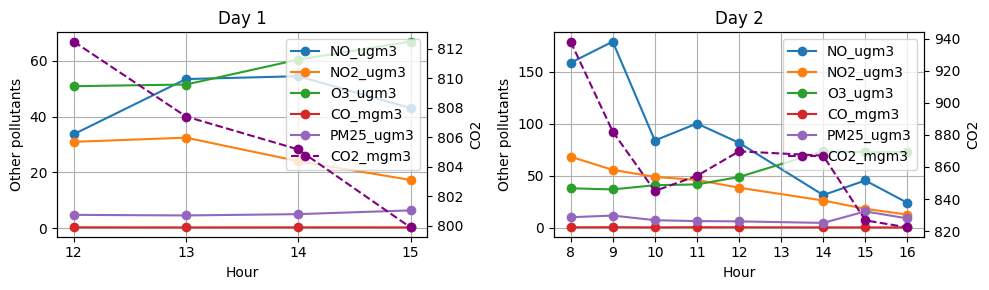

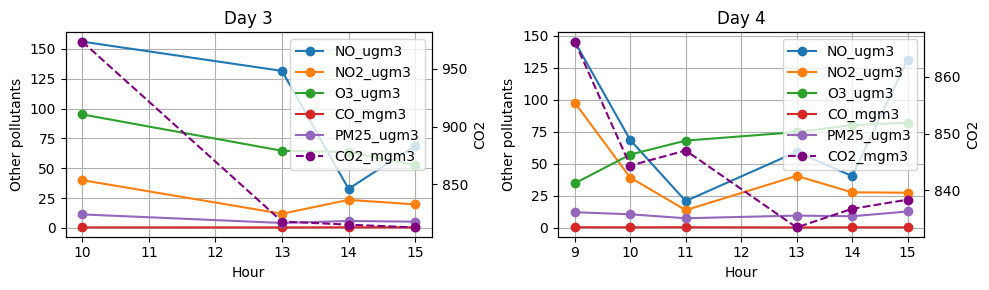

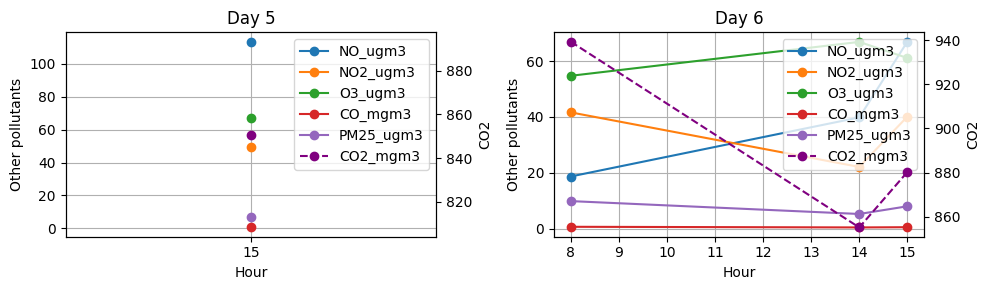

last week


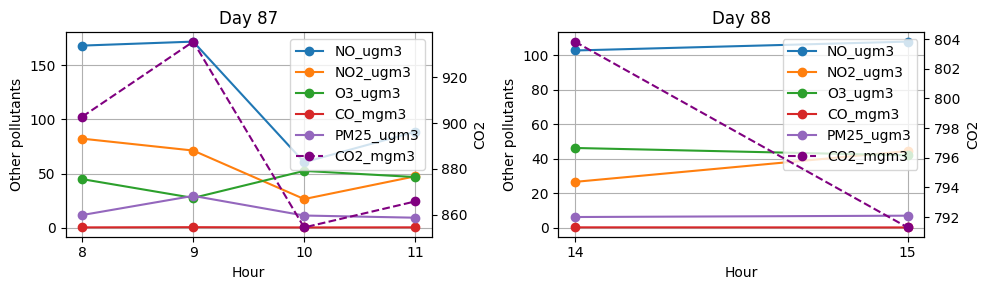

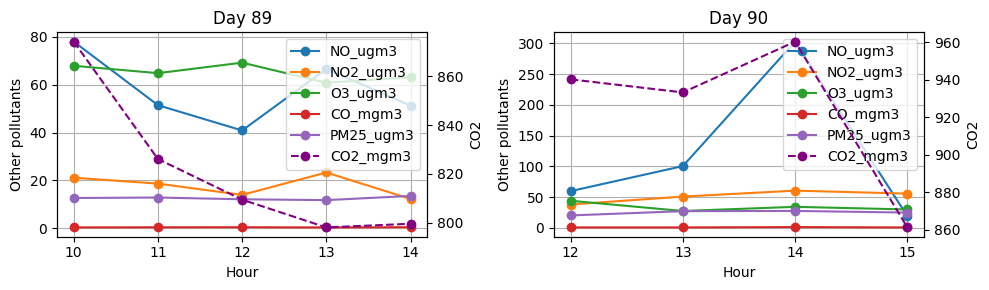

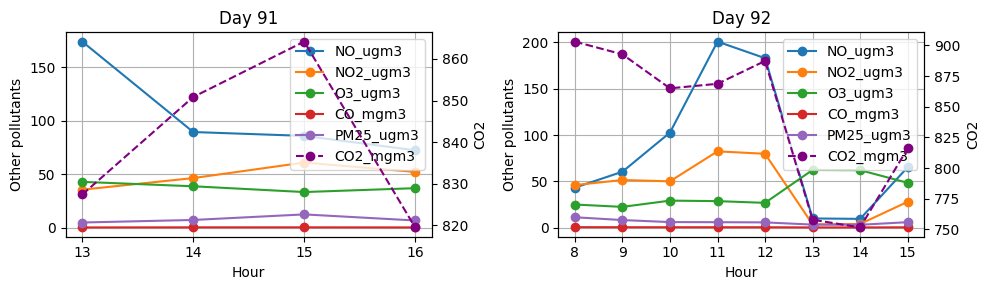

In [54]:
import matplotlib.pyplot as plt

# Plots hourly averages of pollutants for specified days, using subplots for each day.
def plot_pollutants_by_hour(air_ts, pollutants, day_numbers):
    # Creates a figure with one subplot per day
    fig, axes = plt.subplots(1, len(day_numbers), figsize=(5 * len(day_numbers), 3))

    # Ensures axes is always iterable, even with a single subplot
    if len(day_numbers) == 1:
        axes = [axes]

    for ax, day_number in zip(axes, day_numbers):
        # Filters data for the given day and calculates hourly means
        df_filtered = air_ts[air_ts['Day_number'] == day_number]
        hourly_means = df_filtered.groupby('Hour')[pollutants].mean().reset_index()

        main_pollutants = [p for p in pollutants if p != 'CO2_mgm3']

        # Plots other pollutants on the primary y-axis
        for pollutant in main_pollutants:
            ax.plot(hourly_means['Hour'], hourly_means[pollutant], label=pollutant, marker='o')
        ax.set_xlabel('Hour')
        ax.set_ylabel('Other pollutants')
        ax.set_title(f'Day {day_number}')
        ax.grid(True)
        ax.set_xticks(range(0, 24))

        # Plots CO2 on a secondary y-axis
        ax2 = ax.twinx()
        ax2.plot(hourly_means['Hour'], hourly_means['CO2_mgm3'], label='CO2_mgm3', color='purple', marker='o', linestyle='--')
        ax2.set_ylabel('CO2')

        # Combines legends from both axes
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()

# Example usage:
pollutants = ['NO_ugm3', 'NO2_ugm3', 'O3_ugm3', 'CO_mgm3', 'CO2_mgm3', 'PM25_ugm3']
plot_pollutants_by_hour(air_ts, pollutants, day_numbers=[1, 2])
plot_pollutants_by_hour(air_ts, pollutants, day_numbers=[3, 4])
plot_pollutants_by_hour(air_ts, pollutants, day_numbers=[5, 6])
print('last week')
plot_pollutants_by_hour(air_ts, pollutants, day_numbers=[87, 88])
plot_pollutants_by_hour(air_ts, pollutants, day_numbers=[89, 90])
plot_pollutants_by_hour(air_ts, pollutants, day_numbers=[91, 92])


Understanding the Daily analysis we can see that some days the data was not very well collected so we can try to take those days off (with less than 4 hours of collection) of consideration to get a deeper analysis

Also looking at the data we can see that the values are very inconsistant throughout the day and that there wasn't much change in air pollution parterns during the day doesn't really have a clear pattern. We could explore that better, but the important thing for the Hypothesis is to understand the transition along the years, so we need to expand the look

Before getting the mean for the days we need to take of the days with very few data, so we leave the ones that have at least 4 hours of data collection

In [55]:
# Filters the dataset to keep only days with at least 4 unique recorded hours
hours_per_day = air_ts.groupby('Day_number')['Hour'].nunique()
valid_days = hours_per_day[hours_per_day >= 4].index
air_ts_filtered = air_ts[air_ts['Day_number'].isin(valid_days)].reset_index(drop=True)

# Displays the first two rows of the filtered dataset
air_ts_filtered.head(2)


,gps_timestamp,NO_ugm3,NO2_ugm3,O3_ugm3,CO_mgm3,CO2_mgm3,PM25_ugm3,Week,Hour,Day_date,Day_number
0,2021-05-06 12:31:02+00:00,40.546,33.507,38.240,0.321,805.010,2.997,18,12,2021-05-06,1
1,2021-05-06 12:31:05+00:00,18.509,36.554,40.461,0.306,805.227,3.027,18,12,2021-05-06,1


In [56]:
# This section separates de Air quality database into Hour and Days to make an analysis time based
air_ts_filtered['gps_timestamp'] = pd.to_datetime(air_ts_filtered['gps_timestamp'])
# For the hourly analysis
air_daily = air_ts_filtered.groupby('Day_number')[pollutants].mean().reset_index()
air_daily

,Day_number,NO_ugm3,NO2_ugm3,O3_ugm3,CO_mgm3,CO2_mgm3,PM25_ugm3
0,1,50.769820,27.731534,56.170355,0.381856,806.019869,5.064824
1,2,110.681767,47.480455,44.128436,0.475246,868.542723,8.516241
2,3,63.942942,22.629391,63.232522,0.463304,828.542058,5.920870
3,4,86.025758,46.042063,62.062323,0.419108,845.408502,10.843773
4,7,73.936124,43.438385,51.740931,0.493717,870.399645,10.537708
...,...,...,...,...,...,...,...
112,127,36.542416,25.426909,33.161781,0.431323,815.096966,8.322774
113,133,90.170321,55.567246,19.109201,0.426328,820.763910,7.105761
114,136,48.255978,23.051469,22.649931,0.332956,787.438975,3.659825
115,143,20.708717,16.200283,33.173022,0.321130,759.958804,2.578457


In [58]:
# Aggregates pollutant data into 5-day blocks and calculates mean values for each block

# Creates a new column that assigns each day to a 5-day block
air_daily['Day_block'] = ((air_daily['Day_number'] - air_daily['Day_number'].min()) // 5) + 1

# Calculates the mean pollutant levels for each 5-day block
air_5days = air_daily.groupby('Day_block')[pollutants].mean().reset_index()

# Retrieves the day number ranges (min and max) for each 5-day block
day_ranges = air_daily.groupby('Day_block')['Day_number'].agg(['min', 'max']).reset_index()

# Merges the mean pollutant data with the corresponding day ranges
air_5days = pd.merge(air_5days, day_ranges, on='Day_block')


This is hard to visualize given the amount of data, but if we split it into 20 days it is better to visualize

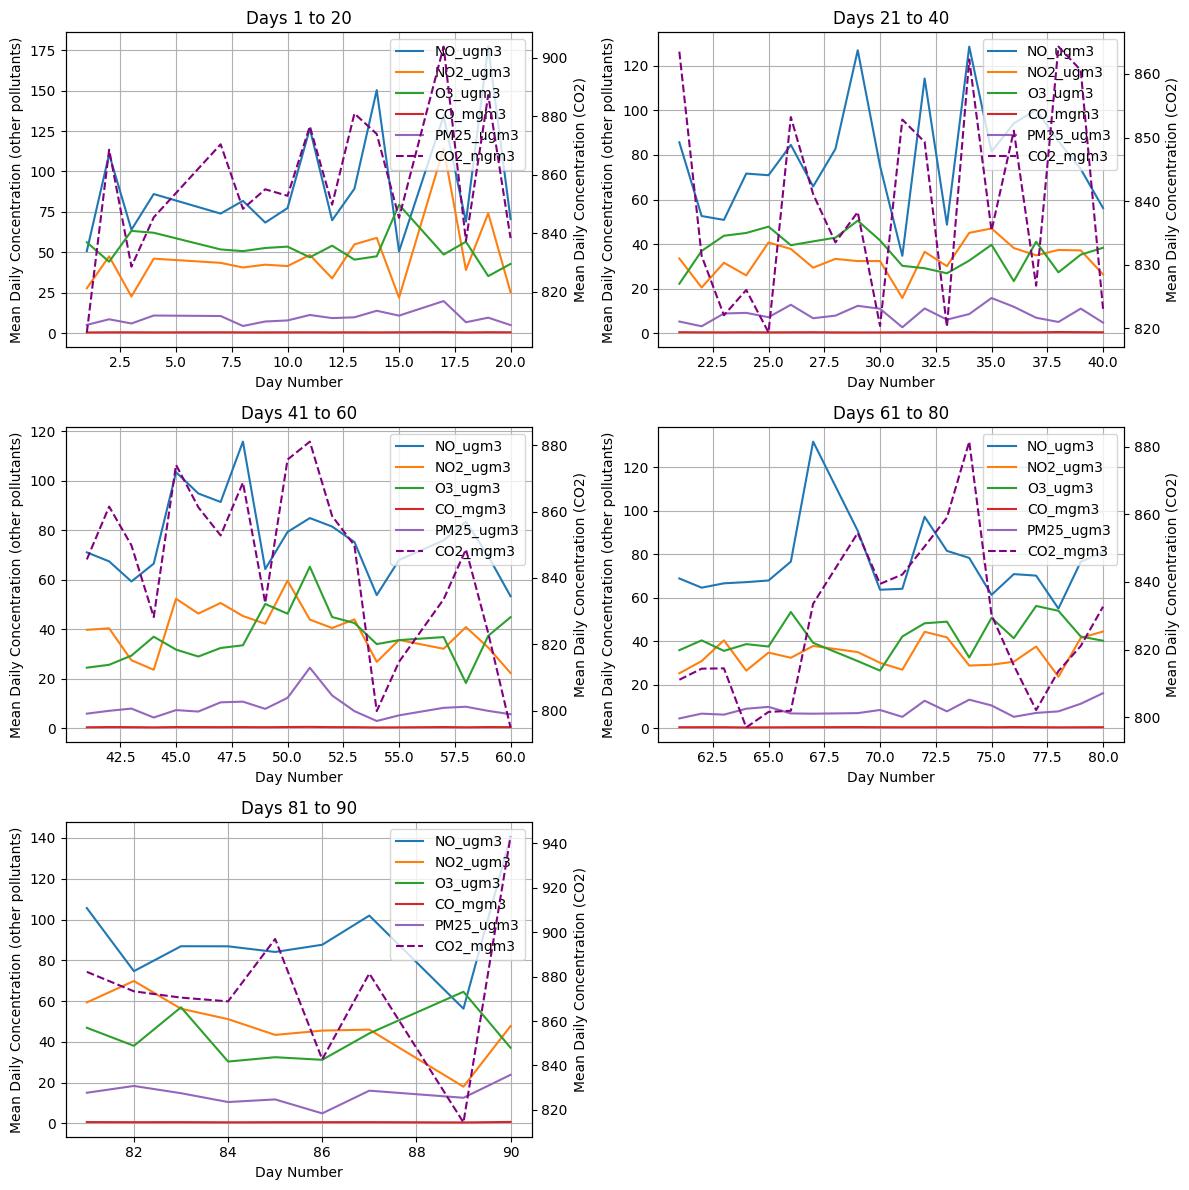

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Plots daily mean concentrations of pollutants over a specified day range, splitting into multiple subplots.
def plot_daily_pollutants(air_daily, pollutants, day_start, day_end, days_per_plot=20):
    # Filters the data for the specified day range
    df_filtered = air_daily[(air_daily['Day_number'] >= day_start) & (air_daily['Day_number'] <= day_end)]

    # Determines how many subplots are needed
    total_days = day_end - day_start + 1
    num_plots = int(np.ceil(total_days / days_per_plot))

    # Creates subplots (2 per row)
    fig, axes = plt.subplots(num_plots // 2 + num_plots % 2, 2, figsize=(12, 4 * (num_plots // 2 + num_plots % 2)))
    axes = axes.flatten()

    main_pollutants = [p for p in pollutants if p != 'CO2_mgm3']

    for i in range(num_plots):
        # Defines the day range for each subplot
        day_range_start = day_start + i * days_per_plot
        day_range_end = min(day_range_start + days_per_plot - 1, day_end)

        df_chunk = df_filtered[(df_filtered['Day_number'] >= day_range_start) & (df_filtered['Day_number'] <= day_range_end)]

        ax1 = axes[i]

        # Plots other pollutants on the primary y-axis
        for pollutant in main_pollutants:
            ax1.plot(df_chunk['Day_number'], df_chunk[pollutant], label=pollutant)
        ax1.set_xlabel('Day Number')
        ax1.set_ylabel('Mean Daily Concentration (other pollutants)')
        ax1.set_title(f'Days {day_range_start} to {day_range_end}')
        ax1.grid(True)

        # Plots CO2 on a secondary y-axis
        ax2 = ax1.twinx()
        ax2.plot(df_chunk['Day_number'], df_chunk['CO2_mgm3'], label='CO2_mgm3', color='purple', linestyle='--')
        ax2.set_ylabel('Mean Daily Concentration (CO2)')

        # Combines legends from both axes
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Removes empty subplots if total number of plots is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage:
pollutants = ['NO_ugm3', 'NO2_ugm3', 'O3_ugm3', 'CO_mgm3', 'CO2_mgm3', 'PM25_ugm3']
plot_daily_pollutants(air_daily, pollutants, day_start=1, day_end=90, days_per_plot=20)


Analysing the picture the values are actualy very inconsistent

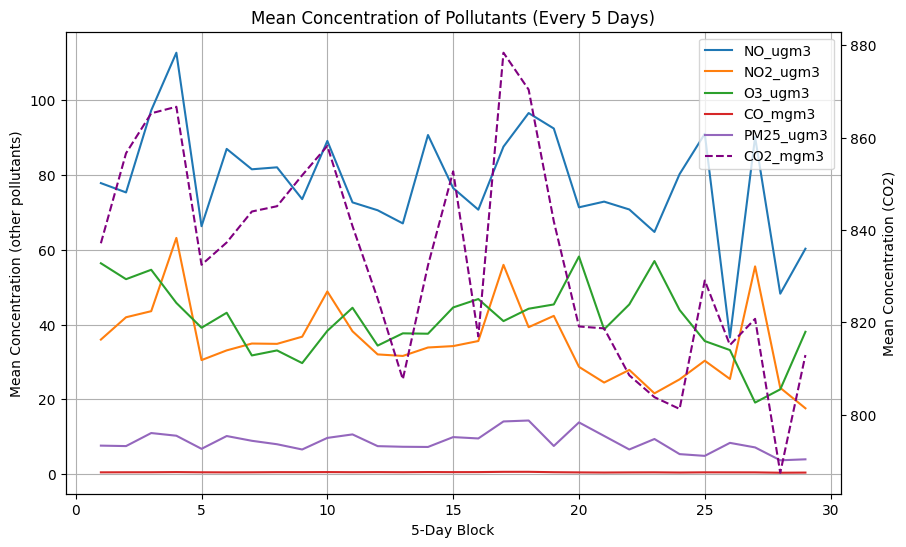

In [62]:
import matplotlib.pyplot as plt

# Plots mean concentrations of pollutants aggregated in 5-day blocks
def plot_5day_pollutants(air_5days, pollutants):
    main_pollutants = [p for p in pollutants if p != 'CO2_mgm3']

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plots other pollutants on the primary y-axis
    for pollutant in main_pollutants:
        ax1.plot(air_5days['Day_block'], air_5days[pollutant], label=pollutant)
    ax1.set_xlabel('5-Day Block')
    ax1.set_ylabel('Mean Concentration (other pollutants)')
    ax1.grid(True)

    # Plots CO2 on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(air_5days['Day_block'], air_5days['CO2_mgm3'], label='CO2_mgm3', color='purple', linestyle='--')
    ax2.set_ylabel('Mean Concentration (CO2)')

    # Combines legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    plt.title('Mean Concentration of Pollutants (Every 5 Days)')
    plt.show()

# Example usage
plot_5day_pollutants(air_5days, pollutants)


Seeing this last comparison we can actually see a slight decrease in the concentration of pollutants, with the exeption of O3, that shows that activities in 2021 were already up, or that it just didn't impact the quality of the air being back into action from 2021-2022. Our Hypothesis was refutaded

# Hypothesis 2: Better air quality = more people cycling/walking

In [18]:
# Load both datasets (adjust paths as needed)
cycle_df = pd.read_csv('cycle-counts-2022.csv', parse_dates=['Time'], dayfirst=True)
pedestrian_df = pd.read_csv('pedestrian-counts-2022.csv', parse_dates=['Time'], dayfirst=True)

# Sum all count columns (excluding Time)
cycle_df['TotalCyclists'] = cycle_df.drop(columns=['Time']).sum(axis=1)
pedestrian_df['TotalPedestrians'] = pedestrian_df.drop(columns=['Time']).sum(axis=1)

# Combine pedestrian and cyclist counts
people_df = pd.DataFrame()
people_df['Time'] = cycle_df['Time']  # assume time columns match
people_df['TotalPeople'] = cycle_df['TotalCyclists'] + pedestrian_df['TotalPedestrians']

# Add ISO week number
people_df['Week'] = people_df['Time'].dt.isocalendar().week

# Weekly average of total people (cycling + walking)
weekly_people = people_df.groupby('Week')['TotalPeople'].mean().reset_index()


###  Pedestrian DataBase

In [19]:
pedestrian_df

,Time,Aston Quay/Fitzgeralds,Aston Quay/Fitzgeralds IN,Aston Quay/Fitzgeralds OUT,Bachelors walk/Bachelors way,Bachelors walk/Bachelors way IN,Bachelors walk/Bachelors way OUT,Baggot st lower/Wilton tce inbound,Baggot st lower/Wilton tce inbound Pedestrians IN,Baggot st lower/Wilton tce inbound Pedestrians OUT,...,Talbot st/Murrays Pharmacy,Talbot st/Murrays Pharmacy IN,Talbot st/Murrays Pharmacy OUT,Westmoreland Street East/Fleet street,Westmoreland Street East/Fleet street IN,Westmoreland Street East/Fleet street OUT,Westmoreland Street West/Carrolls,Westmoreland Street West/Carrolls IN,Westmoreland Street West/Carrolls OUT,TotalPedestrians
0,2022-01-01 00:00:00,NaN,NaN,NaN,887.0,357.0,530.0,14.0,6.0,8.0,...,0.0,0.0,0.0,61.0,32.0,29.0,375.0,277.0,98.0,42046.0
1,2022-01-01 01:00:00,NaN,NaN,NaN,1016.0,448.0,568.0,5.0,4.0,1.0,...,0.0,0.0,0.0,56.0,38.0,18.0,165.0,108.0,57.0,27932.0
2,2022-01-01 02:00:00,NaN,NaN,NaN,204.0,135.0,69.0,5.0,4.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,80.0,59.0,21.0,28460.0
3,2022-01-01 03:00:00,NaN,NaN,NaN,132.0,96.0,36.0,12.0,9.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,93.0,73.0,20.0,21120.0
4,2022-01-01 04:00:00,NaN,NaN,NaN,57.0,36.0,21.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,22.0,9.0,32468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,4744.0,2352.0,2392.0,0.0,0.0,0.0,156.0,139.0,17.0,...,2151.0,1690.0,461.0,620.0,368.0,252.0,1815.0,1125.0,690.0,94852.0
8756,2022-12-31 20:00:00,4066.0,2004.0,2062.0,0.0,0.0,0.0,120.0,94.0,26.0,...,1976.0,1579.0,397.0,680.0,368.0,312.0,1796.0,1119.0,677.0,79044.0
8757,2022-12-31 21:00:00,4767.0,2222.0,2545.0,0.0,0.0,0.0,125.0,112.0,13.0,...,2106.0,1772.0,334.0,623.0,374.0,249.0,1595.0,1018.0,577.0,67382.0
8758,2022-12-31 22:00:00,4567.0,2091.0,2476.0,0.0,0.0,0.0,75.0,55.0,20.0,...,2178.0,1825.0,353.0,627.0,357.0,270.0,1767.0,1153.0,614.0,74534.0


In [20]:
cycle_df

,Time,Charleville Mall,Charleville Mall Cyclist IN,Charleville Mall Cyclist OUT,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd Cyclist IN,Clontarf - James Larkin Rd Cyclist OUT,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark Cyclist IN,Clontarf - Pebble Beach Carpark Cyclist OUT,...,Grove Road Totem IN,North Strand Rd N/B,North Strand Rd S/B,Richmond Street Cyclists 1,Richmond Street Cyclists 1 Cyclist IN,Richmond Street Cyclists 1 Cyclist OUT,Richmond Street Cyclists 2,Richmond Street Cyclists 2 Cyclist IN,Richmond Street Cyclists 2 Cyclist OUT,TotalCyclists
0,2022-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,...,1.0,3.0,1.0,9.0,1.0,8.0,4.0,0.0,4.0,56.0
1,2022-01-01 01:00:00,2.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,...,8.0,7.0,5.0,6.0,0.0,6.0,1.0,0.0,1.0,70.0
2,2022-01-01 02:00:00,0.0,0.0,0.0,2.0,1.0,1.0,4.0,0.0,4.0,...,0.0,2.0,3.0,9.0,0.0,9.0,6.0,0.0,6.0,65.0
3,2022-01-01 03:00:00,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,...,4.0,5.0,0.0,6.0,0.0,6.0,2.0,0.0,2.0,49.0
4,2022-01-01 04:00:00,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,5.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,4.0,1.0,3.0,4.0,1.0,3.0,9.0,5.0,4.0,...,24.0,0.0,NaN,31.0,1.0,30.0,46.0,2.0,44.0,296.0
8756,2022-12-31 20:00:00,4.0,3.0,1.0,4.0,3.0,1.0,5.0,2.0,3.0,...,27.0,0.0,NaN,12.0,0.0,12.0,36.0,0.0,36.0,242.0
8757,2022-12-31 21:00:00,4.0,3.0,1.0,3.0,1.0,2.0,8.0,4.0,4.0,...,16.0,0.0,NaN,16.0,0.0,16.0,28.0,0.0,28.0,182.0
8758,2022-12-31 22:00:00,4.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,18.0,0.0,NaN,6.0,2.0,4.0,19.0,0.0,19.0,124.0


This database uses locations that don't overlap in order to merge location to the analysis, anyways we can still overlap the analysis of people and cyclists out in the days comparing it to air pollution in the regions, but in this case we cannot take the mean, but we sum the total number from every hour, tho that could give out the wrong total number (some cyclists could be the same) it is better than to give the mean that would be an incorrect comparison during the hours of no traffic.

First we maintain the columns of interest and separate time from data

In [21]:
# Leaves on TotalCyclists and TotalPedestrians
cycle_ts = cycle_df[['Time', 'TotalCyclists']]
pedestrian_ts = pedestrian_df[['Time', 'TotalPedestrians']]

# Separates time and data
cycle_ts['Day_date'] = cycle_ts['Time'].dt.date
# extracts hour to two digits (just like air pollution)
cycle_ts['Hour'] = cycle_ts['Time'].dt.strftime('%H')
cycle_ts = cycle_ts[['Day_date', 'Hour', 'TotalCyclists']]

# Separates time and data
pedestrian_ts['Day_date'] = pedestrian_ts['Time'].dt.date
# extracts hour to two digits (just like air pollution)
pedestrian_ts['Hour'] = pedestrian_ts['Time'].dt.strftime('%H')
pedestrian_ts = pedestrian_ts[['Day_date', 'Hour', 'TotalPedestrians']]

# Results
cycle_ts.head(2)
pedestrian_ts.head(2)

<ipython-input-21-cc9a6d15b3bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cycle_ts['Day_date'] = cycle_ts['Time'].dt.date
<ipython-input-21-cc9a6d15b3bf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cycle_ts['Hour'] = cycle_ts['Time'].dt.strftime('%H')
<ipython-input-21-cc9a6d15b3bf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Day_date,Hour,TotalPedestrians
0,2022-01-01,00,42046.0
1,2022-01-01,01,27932.0


Now we can compare some of the data from the bases by themselves

In [22]:
cycle_ts.head(2)

,Day_date,Hour,TotalCyclists
0,2022-01-01,00,56.0
1,2022-01-01,01,70.0


Merging them is an option to make the analysis more clear

In [63]:
# Merges pedestrian and cyclist datasets on date and hour to align their time series
flow_df = pd.merge(pedestrian_ts, cycle_ts, on=['Day_date', 'Hour'], how='inner')

# Displays the first five rows of the merged dataset
flow_df.head()


,Day_date,Hour,TotalPedestrians,TotalCyclists
0,2022-01-01,00,42046.0,56.0
1,2022-01-01,01,27932.0,70.0
2,2022-01-01,02,28460.0,65.0
3,2022-01-01,03,21120.0,49.0
4,2022-01-01,04,32468.0,33.0


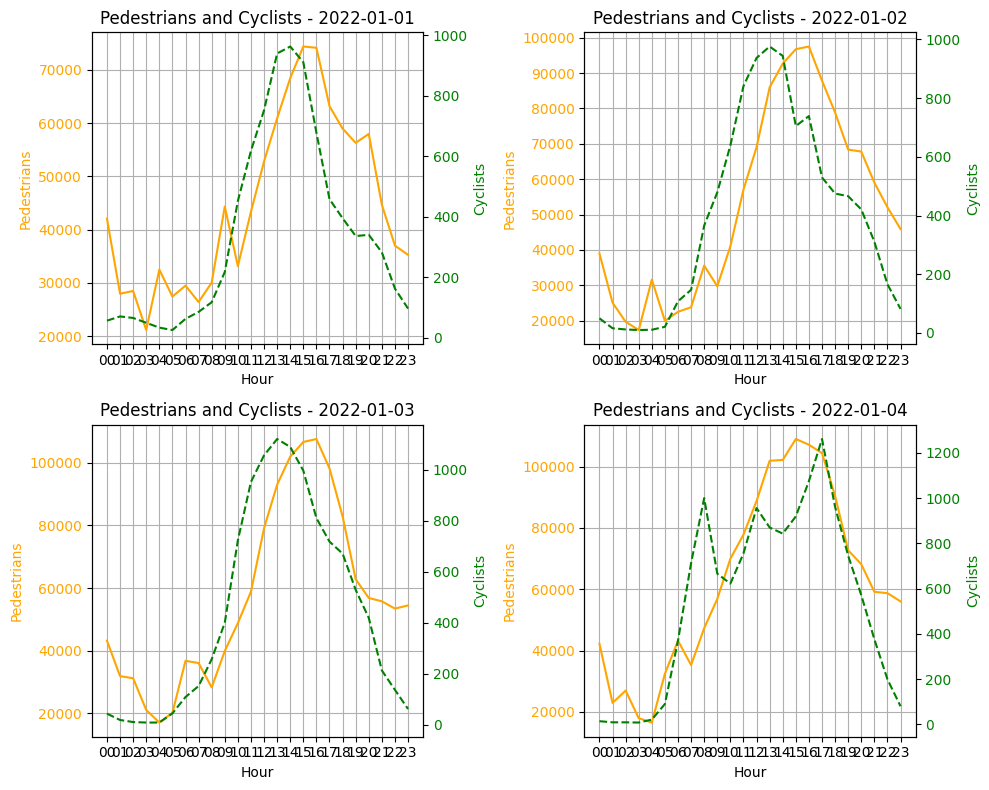

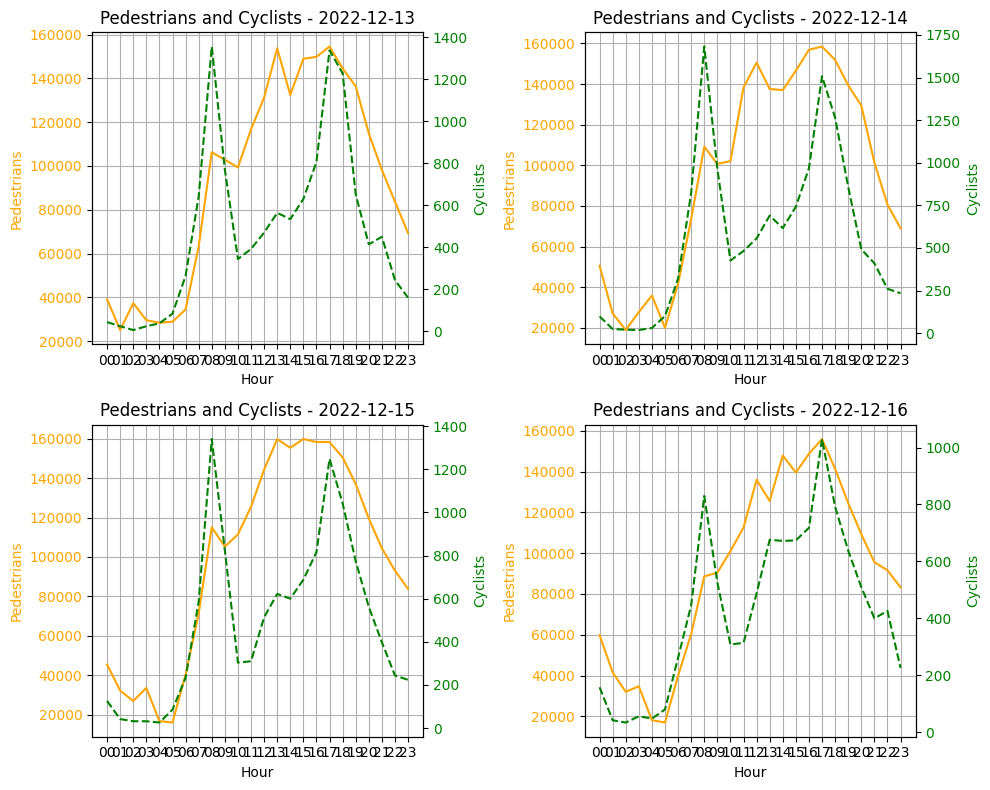

In [64]:
import matplotlib.pyplot as plt

# Plots pedestrians and cyclists counts per hour for selected days, using dual y-axes
def plot_dual_axis_pedestrians_cyclists(df, day_start, day_end):
    unique_days = df['Day_date'].unique()
    selected_days = unique_days[day_start - 1:day_end]

    num_days = len(selected_days)
    ncols = 2  # 2 plots per row
    nrows = (num_days + ncols - 1) // ncols  # calculates number of rows needed

    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 4 * nrows))
    axes = axes.flatten()

    for i, day in enumerate(selected_days):
        df_day = df[df['Day_date'] == day]

        # Primary y-axis for pedestrians
        ax1 = axes[i]
        ax1.plot(df_day['Hour'], df_day['TotalPedestrians'], color='orange', label='Pedestrians')
        ax1.set_ylabel('Pedestrians', color='orange')
        ax1.tick_params(axis='y', labelcolor='orange')
        ax1.set_xlabel('Hour')
        ax1.set_title(f'Pedestrians and Cyclists - {day}')
        ax1.grid(True)

        # Secondary y-axis for cyclists
        ax2 = ax1.twinx()
        ax2.plot(df_day['Hour'], df_day['TotalCyclists'], color='green', linestyle='--', label='Cyclists')
        ax2.set_ylabel('Cyclists', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

    # Removes empty subplots if total number is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage:
plot_dual_axis_pedestrians_cyclists(flow_df, day_start=1, day_end=4)
plot_dual_axis_pedestrians_cyclists(flow_df, day_start=347, day_end=350)


Mostly the pesdestrian and cycling flow overlap during day time, that checks out, for a larger scale look, we will plot the first days of each month. Comparing the first few days to the last, we can see there's much more people at the end of the year. We can also check that plotting by means from each hour in each mont

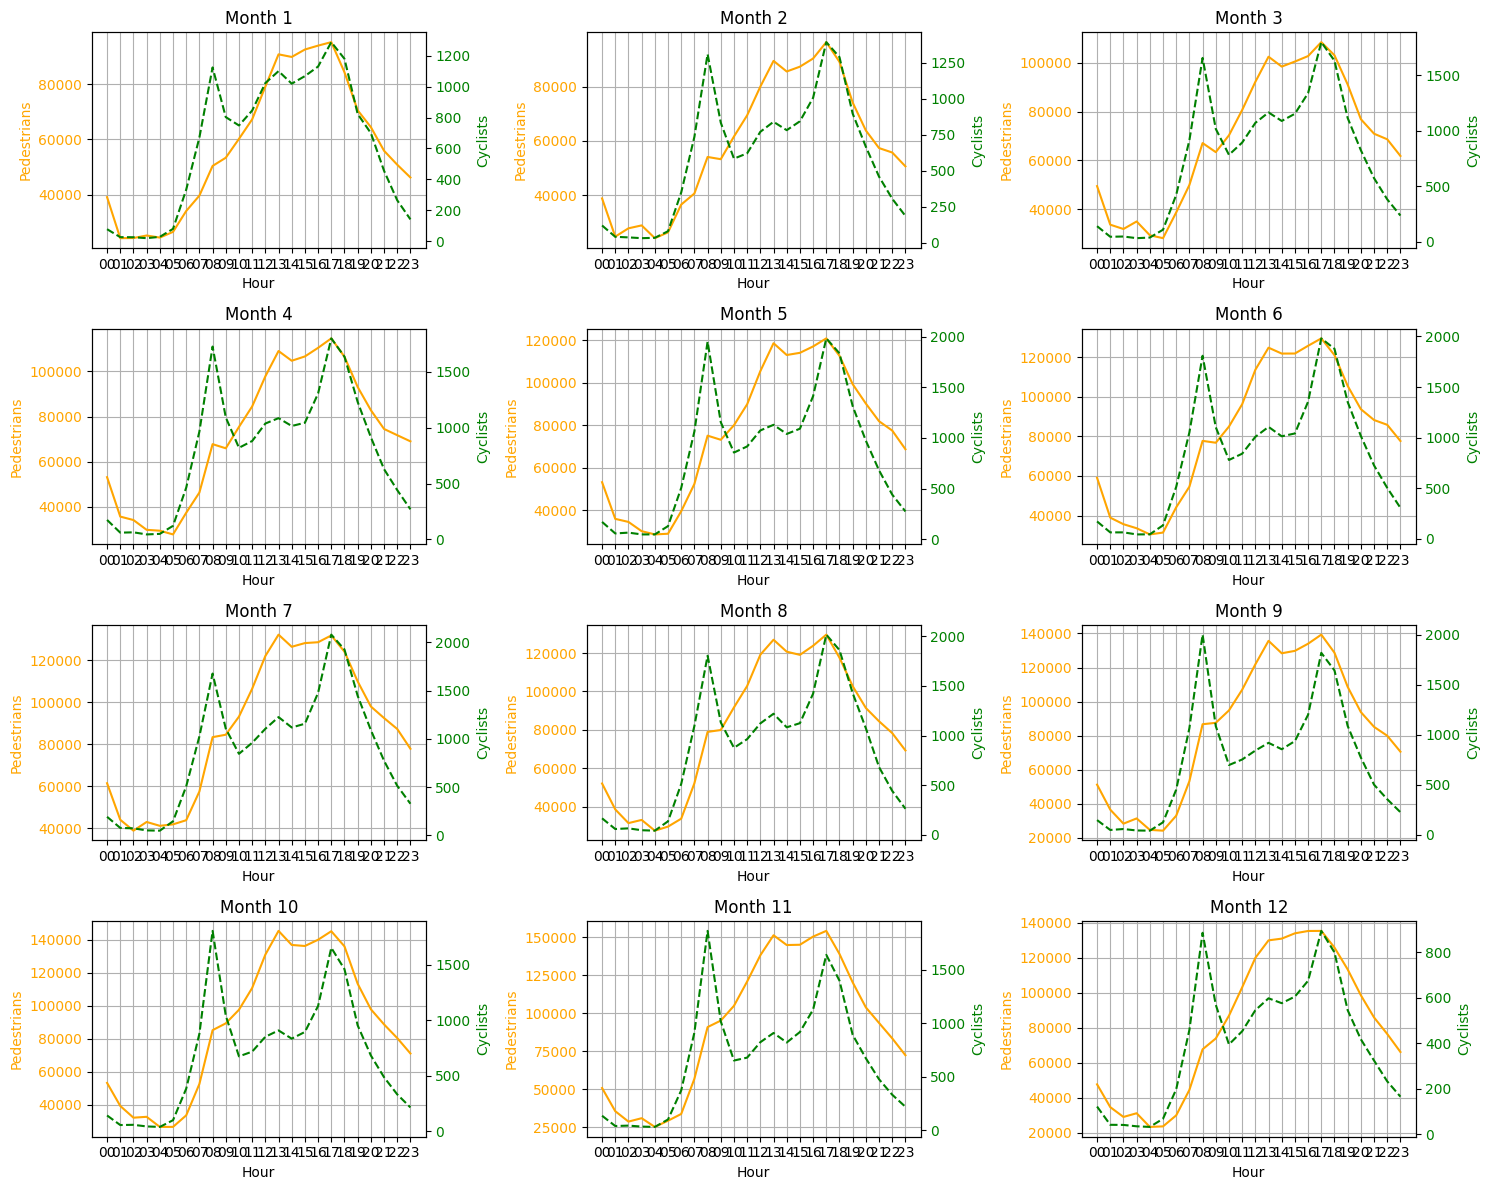

In [65]:
import matplotlib.pyplot as plt

# Plots mean hourly counts of pedestrians and cyclists for each month in separate subplots
def plot_monthly_mean_pedestrians_cyclists(df):
    df['Day_date'] = pd.to_datetime(df['Day_date'])  # Ensures 'Day_date' is in datetime format
    df['Month'] = df['Day_date'].dt.month  # Extracts the month from the date

    fig, axes = plt.subplots(4, 3, figsize=(15, 12))  # 12 months, arranged in 4 rows x 3 columns
    axes = axes.flatten()

    for month in range(1, 13):
        # Filters data for the current month and calculates mean counts per hour
        df_month = df[df['Month'] == month]
        df_grouped = df_month.groupby('Hour').agg({'TotalPedestrians': 'mean', 'TotalCyclists': 'mean'}).reset_index()

        # Plots pedestrians and cyclists using dual y-axes
        ax1 = axes[month - 1]
        ax1.plot(df_grouped['Hour'], df_grouped['TotalPedestrians'], color='orange', label='Pedestrians')
        ax1.set_ylabel('Pedestrians', color='orange')
        ax1.tick_params(axis='y', labelcolor='orange')
        ax1.set_xlabel('Hour')
        ax1.set_title(f'Month {month}')
        ax1.grid(True)

        ax2 = ax1.twinx()
        ax2.plot(df_grouped['Hour'], df_grouped['TotalCyclists'], color='green', linestyle='--', label='Cyclists')
        ax2.set_ylabel('Cyclists', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_monthly_mean_pedestrians_cyclists(flow_df)


We can also create the bases for the daily overall number of pedestriand and bykes each by summing the numbers for each column, and do that also for weeks and month

In [66]:
# Aggregates pedestrian and cyclist counts by day, week, and month

flow_df['Day_date'] = pd.to_datetime(flow_df['Day_date'])  # Ensures 'Day_date' is in datetime format

# Daily aggregation: sums total pedestrians and cyclists per day
daily_sum = flow_df.groupby('Day_date').agg({
    'TotalPedestrians': 'sum',
    'TotalCyclists': 'sum'
}).reset_index()

# Weekly aggregation: sums totals per ISO calendar week and year
flow_df['Week'] = flow_df['Day_date'].dt.isocalendar().week
flow_df['Year'] = flow_df['Day_date'].dt.isocalendar().year
weekly_sum = flow_df.groupby(['Year', 'Week']).agg({
    'TotalPedestrians': 'sum',
    'TotalCyclists': 'sum'
}).reset_index()

# Monthly aggregation: sums totals per month and year
flow_df['Month'] = flow_df['Day_date'].dt.month
flow_df['Year'] = flow_df['Day_date'].dt.year
monthly_sum = flow_df.groupby(['Year', 'Month']).agg({
    'TotalPedestrians': 'sum',
    'TotalCyclists': 'sum'
}).reset_index()

# Displays the first rows of each aggregation
print("Daily:")
print(daily_sum.head())

print("\nWeekly:")
print(weekly_sum.head())

print("\nMonthly:")
print(monthly_sum.head())


Daily:
    Day_date  TotalPedestrians  TotalCyclists
0 2022-01-01         1069852.0         8162.0
1 2022-01-02         1264252.0         9452.0
2 2022-01-03         1365454.0        10550.0
3 2022-01-04         1507720.0        13133.0
4 2022-01-05         1452874.0        13496.0

Weekly:
   Year  Week  TotalPedestrians  TotalCyclists
0  2021    52         2334104.0        17614.0
1  2022     1         9736492.0        80849.0
2  2022     2         9554648.0       114071.0
3  2022     3         9734884.0       116054.0
4  2022     4        10051442.0       119076.0

Monthly:
   Year  Month  TotalPedestrians  TotalCyclists
0  2022      1        42819554.0       464192.0
1  2022      2        39369168.0       398058.0
2  2022      3        51365226.0       573930.0
3  2022      4        51859862.0       566137.0
4  2022      5        57031158.0       626104.0


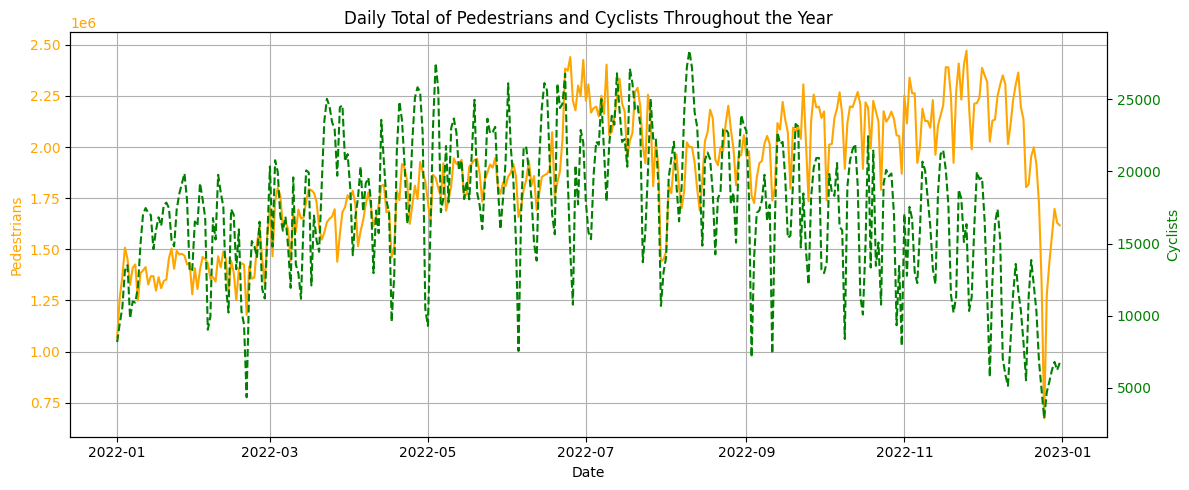

In [67]:
import matplotlib.pyplot as plt

# Plots daily total counts of pedestrians and cyclists over the year using dual y-axes
def plot_yearly_daily_totals(daily_sum):
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Primary y-axis for pedestrians
    ax1.plot(daily_sum['Day_date'], daily_sum['TotalPedestrians'], color='orange', label='Pedestrians')
    ax1.set_ylabel('Pedestrians', color='orange')
    ax1.tick_params(axis='y', labelcolor='orange')
    ax1.set_xlabel('Date')
    ax1.grid(True)

    # Secondary y-axis for cyclists
    ax2 = ax1.twinx()
    ax2.plot(daily_sum['Day_date'], daily_sum['TotalCyclists'], color='green', linestyle='--', label='Cyclists')
    ax2.set_ylabel('Cyclists', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title('Daily Total of Pedestrians and Cyclists Throughout the Year')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_yearly_daily_totals(daily_sum)


Turns out actually it seems like the number of pedestrians went up but the cyclists went a little down. We can plot it in weeks for a cleaner view

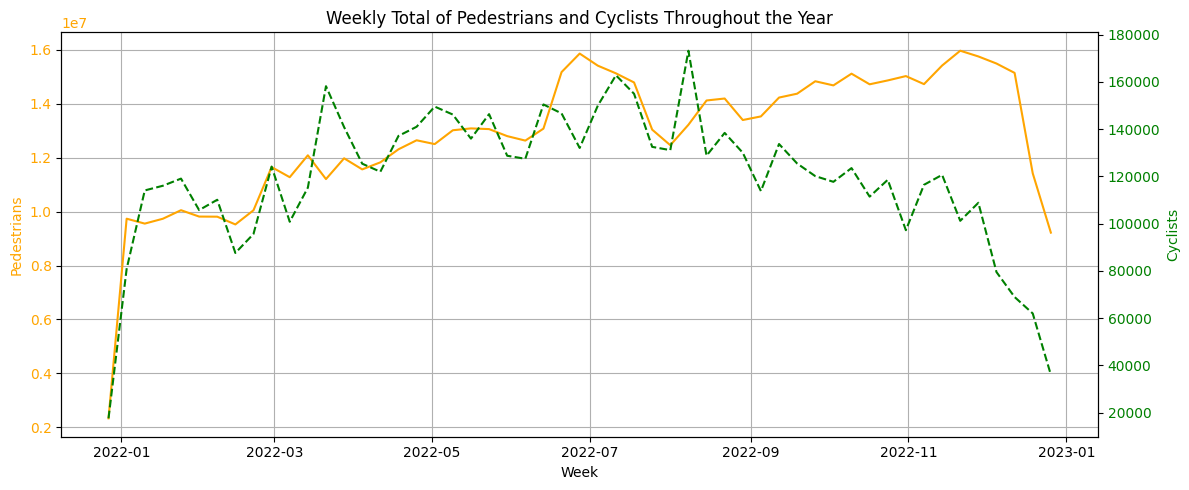

In [68]:
import matplotlib.pyplot as plt

# Plots weekly total counts of pedestrians and cyclists over the year using dual y-axes
def plot_yearly_weekly_totals(weekly_sum):
    # Creates a date for the start of each week (Monday)
    weekly_sum['Week_start'] = pd.to_datetime(
        weekly_sum['Year'].astype(str) + '-W' + weekly_sum['Week'].astype(str) + '-1',
        format='%G-W%V-%u'
    )

    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Primary y-axis for pedestrians
    ax1.plot(weekly_sum['Week_start'], weekly_sum['TotalPedestrians'], color='orange', label='Pedestrians')
    ax1.set_ylabel('Pedestrians', color='orange')
    ax1.tick_params(axis='y', labelcolor='orange')
    ax1.set_xlabel('Week')
    ax1.grid(True)

    # Secondary y-axis for cyclists
    ax2 = ax1.twinx()
    ax2.plot(weekly_sum['Week_start'], weekly_sum['TotalCyclists'], color='green', linestyle='--', label='Cyclists')
    ax2.set_ylabel('Cyclists', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title('Weekly Total of Pedestrians and Cyclists Throughout the Year')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_yearly_weekly_totals(weekly_sum)


Hourly and Daily air quallity

In [29]:
# 1. Base hourly
air_hourly_ts = air_ts_filtered.groupby(['Day_date', 'Hour'])[pollutants].mean().reset_index()

# 2. Base daily
air_daily_ts = air_ts_filtered.groupby('Day_date')[pollutants].mean().reset_index()

# Exibe as bases
print("Hourly:")
print(air_hourly_ts.head())

print("\nDaily:")
print(air_daily_ts.head())

Hourly:
     Day_date  Hour     NO_ugm3   NO2_ugm3    O3_ugm3   CO_mgm3    CO2_mgm3  \
0  2021-05-06    12   33.673475  30.956656  50.832197  0.406098  812.470590   
1  2021-05-06    13   53.379084  32.444628  51.430646  0.369155  807.394068   
2  2021-05-06    14   54.402984  24.050733  60.323931  0.395789  805.161146   
3  2021-05-06    15   43.020456  17.331008  66.758752  0.385880  799.874488   
4  2021-05-07     8  158.600886  68.273455  37.947875  0.450062  938.119909   

   PM25_ugm3  
0   4.856967  
1   4.655585  
2   5.117729  
3   6.459680  
4  10.128881  

Daily:
     Day_date     NO_ugm3   NO2_ugm3    O3_ugm3   CO_mgm3    CO2_mgm3  \
0  2021-05-06   50.769820  27.731534  56.170355  0.381856  806.019869   
1  2021-05-07  110.681767  47.480455  44.128436  0.475246  868.542723   
2  2021-05-10   63.942942  22.629391  63.232522  0.463304  828.542058   
3  2021-05-11   86.025758  46.042063  62.062323  0.419108  845.408502   
4  2021-05-14   73.936124  43.438385  51.740931  0.493

# Relationship between air quality and the number of people circulating in Dublin (pedestrians + cyclists)

After processing and integrating the datasets, we conducted an analysis to explore the relationship between air quality and the number of people circulating in Dublin (pedestrians + cyclists), as proposed in Hypothesis 2:

"Better air quality = more people cycling/walking".

The central idea of this hypothesis is to assess whether better air quality levels encourage greater movement of people, both on foot and by bicycle. This approach considers that the perception of a healthier environment may stimulate active modes of transport.

To test this relationship, we used scatter plots with regression lines for each monitored pollutant (NO, NO2, O3, CO, CO2, PM2.5), where:

The X-axis represents the pollutant concentration (in different units, such as µg/m³ or mg/m³);

The Y-axis represents the daily total number of people (pedestrians + cyclists).

The red line represents the general trend between the two variables (obtained through linear regression), while the shaded area shows the confidence interval for this trend.

These plots allow us to visualize the direction and strength of the relationship between each pollutant and the people flow. For example:

A downward trend line suggests that higher pollutant concentrations are associated with fewer people circulating;

An upward trend line would indicate the opposite.

In this way, we were able to empirically test whether better air quality (lower pollutant levels) is associated with a greater presence of pedestrians and cyclists, supporting or refuting the proposed hypothesis.




In [69]:
# Merges daily pedestrian/cyclist totals with air quality data based on date

daily_sum['Day_date'] = pd.to_datetime(daily_sum['Day_date'])      # Ensures 'Day_date' is in datetime format
air_daily_ts['Day_date'] = pd.to_datetime(air_daily_ts['Day_date'])  # Same for air quality dataset

# Merges datasets on 'Day_date'
merged = pd.merge(daily_sum, air_daily_ts, on='Day_date')

# Creates a new column with the total number of people (pedestrians + cyclists)
merged['TotalPeople'] = merged['TotalCyclists'] + merged['TotalPedestrians']

# Displays the first 10 rows of the merged dataset
merged.head(10)


,Day_date,TotalPedestrians,TotalCyclists,NO_ugm3,NO2_ugm3,O3_ugm3,CO_mgm3,CO2_mgm3,PM25_ugm3,TotalPeople
0,2022-04-11,1657484.0,17285.0,56.239805,17.984078,64.542169,0.438392,814.361371,12.537844,1674769.0
1,2022-04-12,1714712.0,15723.0,140.663899,47.707664,37.092328,0.691795,943.054049,23.793410,1730435.0
2,2022-04-13,1809232.0,23583.0,107.032196,49.554526,37.799565,0.498690,848.680503,8.711827,1832815.0
3,2022-04-14,1816020.0,20684.0,121.581051,58.610337,30.289585,0.465349,866.754108,6.443932,1836704.0
4,2022-04-15,1680740.0,18002.0,74.886041,28.489743,50.008017,0.503731,828.673626,3.555341,1698742.0
5,2022-04-19,1787014.0,21404.0,89.677090,46.425763,45.542753,0.452666,839.386901,9.967849,1808418.0
6,2022-04-20,1739826.0,24842.0,69.203123,28.525715,63.245553,0.443105,825.866486,8.780947,1764668.0
7,2022-04-21,1916864.0,23556.0,63.685012,30.933287,58.164052,0.461441,834.634762,19.103905,1940420.0
8,2022-04-22,1898494.0,20479.0,67.642649,29.155862,55.411158,0.425459,810.959718,14.314166,1918973.0
9,2022-04-25,1715796.0,22175.0,86.789065,31.297766,58.681028,0.396311,815.909014,8.773287,1737971.0


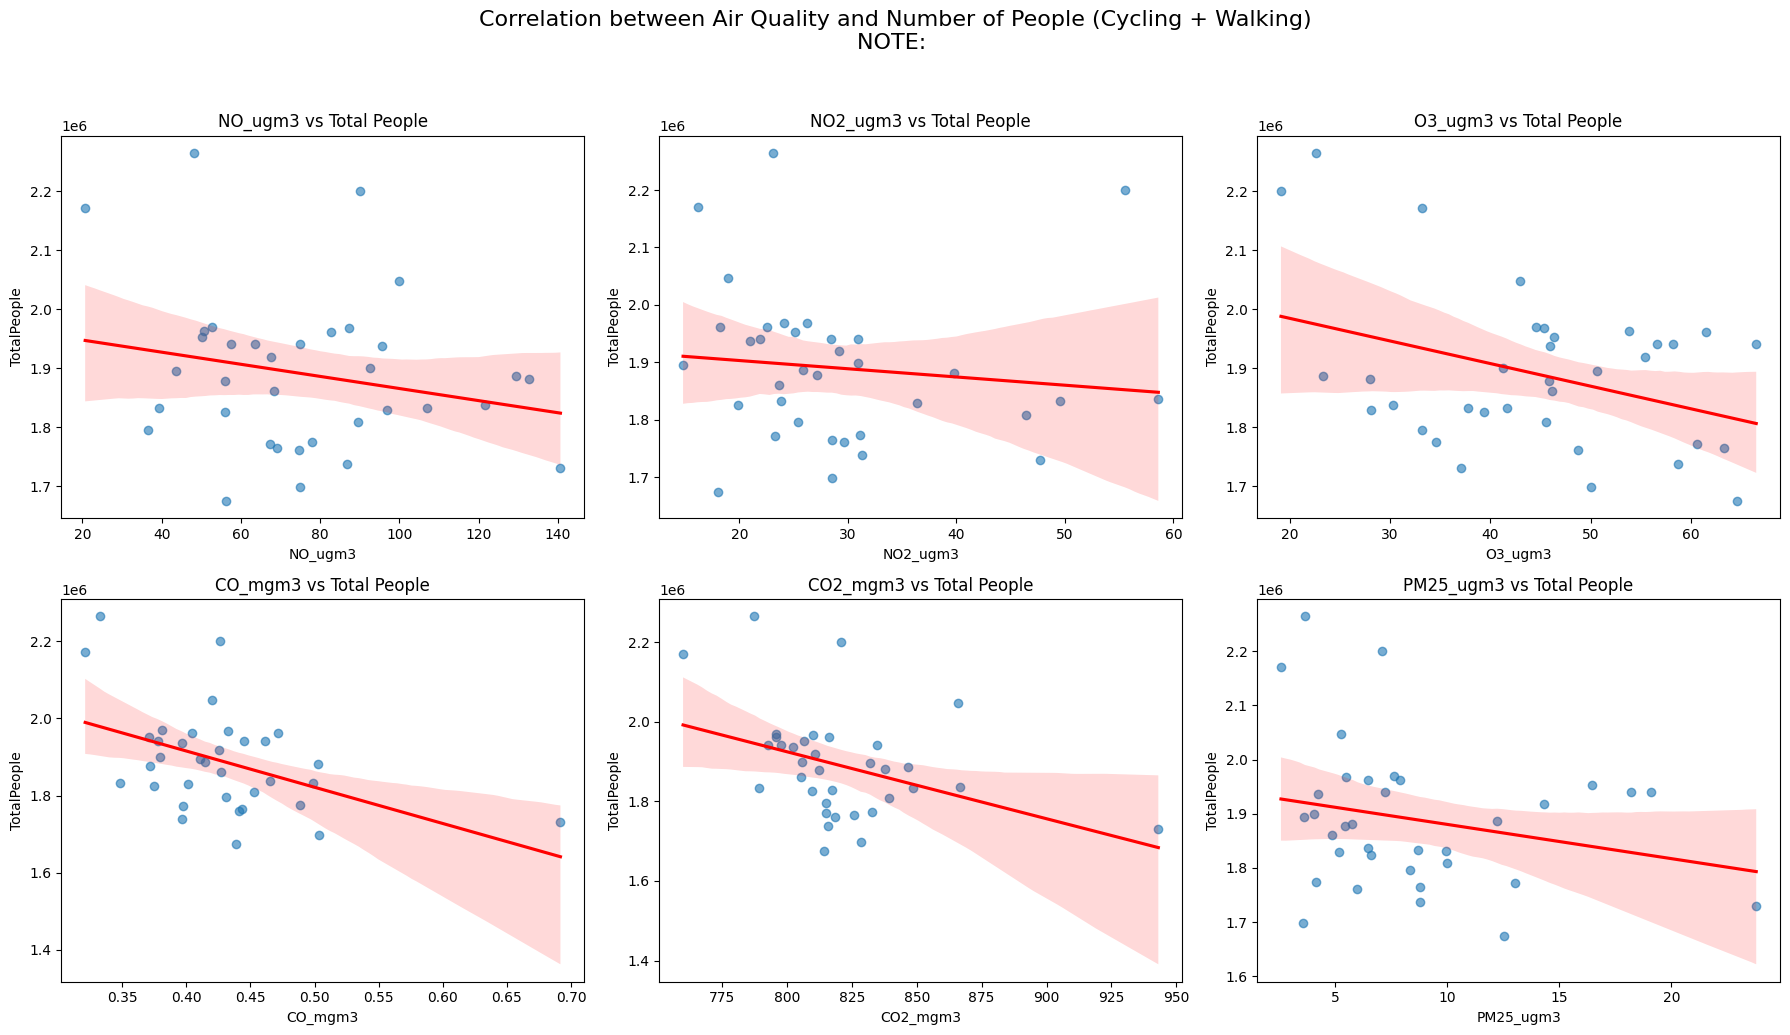

In [70]:
# Plots scatter plots with regression lines to visualize the relationship between pollutants and total people

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    # Scatter plot with regression line for each pollutant vs total people
    sns.regplot(
        ax=axes[i],
        data=merged,
        x=pollutant,
        y='TotalPeople',
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    axes[i].set_title(f'{pollutant} vs Total People')

plt.suptitle('Correlation between Air Quality and Number of People (Cycling + Walking)\nNOTE: ', y=1.03, fontsize=16)
plt.tight_layout()
plt.show()



This hypothesis was tested by analyzing the daily correlation between pedestrian and cyclist counts and the concentration of various air pollutants. The central assumption was that higher levels of active transportation (walking and cycling) would be associated with lower pollutant concentrations, thereby improving air quality.

## Pollutant-by-pollutant justification:
- Nitric Oxide (NO): the correlation observed was positive, meaning that on days with more people walking or cycling, NO levels were higher. This result contradicts the hypothesis. One possible explanation is that increased pedestrian and cyclist counts may coincide with higher overall urban activity, including increased vehicular traffic or reduced atmospheric dispersion, leading to elevated NO concentrations.

- Nitrogen Dioxide (NO₂): the correlation was negative, which supports the hypothesis. As NO₂ is a direct product of vehicle emissions, this suggests that higher active transportation levels may be associated with reduced vehicular traffic, resulting in lower NO₂ concentrations.

- Ozone (O₃): the correlation was again positive, contradicting the hypothesis. However, ozone is a secondary pollutant formed through photochemical reactions involving NOx and sunlight. Sunny days tend to both increase ozone levels and encourage outdoor activities, which likely explains this positive relationship.

- Carbon Monoxide (CO): the correlation was negative, which supports the hypothesis. CO primarily originates from vehicle emissions, and the negative correlation suggests that more active transportation correlates with reduced vehicular activity, leading to lower CO levels.

- Carbon Dioxide (CO₂): the correlation was also negative, which supports the hypothesis. Although CO₂ has a relatively stable global concentration, local variations can occur due to traffic patterns. The negative correlation indicates that higher pedestrian and cyclist counts may correspond to reduced local CO₂ emissions.

- Particulate Matter (PM2.5), the correlation was negative, further supporting the hypothesis. PM2.5 is emitted from vehicle exhaust, industrial processes, and construction activities. The data suggests that higher levels of active mobility are associated with lower PM2.5 concentrations, possibly due to reduced traffic congestion.

### Conclusion:

The analysis provides partial support for the hypothesis that increased active transportation contributes to improved air quality. Pollutants such as NO₂, CO, CO₂, and PM2.5 exhibited negative correlations with pedestrian and cyclist counts, which aligns with the hypothesis. However, NO and O₃ presented positive correlations, contradicting the expected outcome. In particular, the behavior of ozone is likely influenced by sunny weather conditions, which simultaneously increase ozone formation and encourage outdoor activities.

Although the observed correlations were generally weak to moderate, the results indicate that active transportation can play a role in improving air quality, but external factors such as weather conditions, urban airflow patterns, and traffic dynamics must also be considered. Future studies should aim for spatial alignment between air quality sensors and mobility counters, as well as control for additional environmental variables, to validate these findings more robustly.

# Future Analysis

One of the analyses we considered interesting for the city of Dublin was to evaluate the relationship between vehicle traffic flow and air pollutant levels. The idea was to follow a similar approach to what we applied in Hypothesis 2, where we analyzed the relationship between pedestrian and cyclist flow with air quality. In this case, we aimed to understand how traffic volume impacts pollution levels.

To conduct this analysis, we identified vehicle flow datasets provided by SCATS (Sydney Coordinated Adaptive Traffic System), a system used in Dublin to monitor and manage traffic through data collected from roadside detectors at various intersections and road segments. These detectors count the number of vehicles passing through specific sites at different times.


In [34]:
import pandas as pd
import os

# List of SCATS traffic data files
scats_files = [
    'SCATSJuly2022.csv',
    'SCATSAugust2022.csv',
    'SCATSSeptember2022.csv',
    'SCATSOctober2022.csv',
    'SCATSNovember2022.csv',
    'SCATSDecember2022.csv'
]

# List to store individual dataframes
dfs = []

# Loads each SCATS file, selecting only relevant columns, and appends to the list
for file in scats_files:
    df = pd.read_csv(file, usecols=['End_Time', 'Sum_Volume'])
    dfs.append(df)

# Concatenates all dataframes into a single dataframe
scats_all = pd.concat(dfs, ignore_index=True)

# Displays basic information about the concatenated dataframe
print("Final SCATS dataframe shape:", scats_all.shape)
print(scats_all.columns)
scats_all.head()


Formato final do dataframe SCATS: (56058254, 2)
Index(['End_Time', 'Sum_Volume'], dtype='object')


,End_Time,Sum_Volume
0,20220731120000,0.0
1,20220731120000,0.0
2,20220731120000,0.0
3,20220731120000,0.0
4,20220731120000,248.0


However, the SCATS dataset available for this study only covers a limited portion of the year, specifically from July to December 2022. This partial coverage restricts the alignment with the air quality dataset, which includes different or broader timeframes. As we will explore further, this limitation prevented a direct comparison between vehicle traffic and pollutant levels, but it did allow us to investigate other mobility dynamics within the city.

In [71]:
# Converts 'End_Time' to datetime format (timestamp)
scats_all['End_Time'] = pd.to_datetime(scats_all['End_Time'], format='%Y%m%d%H%M%S')

# Creates a new column 'Day_date' with only the date (removes time)
scats_all['Day_date'] = scats_all['End_Time'].dt.date

# Aggregates total vehicle volume per day (daily sum)
traffic_daily = scats_all.groupby(['Day_date'])['Sum_Volume'].sum().reset_index()
traffic_daily.rename(columns={'Sum_Volume': 'TotalVehicles'}, inplace=True)

# Displays the first 10 rows of the daily traffic totals
traffic_daily.head(10)


,Day_date,TotalVehicles
0,2022-07-01,16530415.0
1,2022-07-02,14431932.0
2,2022-07-03,13151451.0
3,2022-07-04,14908107.0
4,2022-07-05,15242803.0
5,2022-07-06,15504220.0
6,2022-07-07,15991184.0
7,2022-07-08,16361052.0
8,2022-07-09,14377210.0
9,2022-07-10,12998004.0


However, it was not possible to conduct this analysis directly, as the datasets for vehicle flow and air pollutants covered different periods. This prevented the alignment of the information, since this type of analysis requires both datasets to cover the same dates to ensure consistency.

In [72]:
# Merges daily pedestrian/cyclist totals with daily vehicle traffic data based on date

traffic_daily['Day_date'] = pd.to_datetime(traffic_daily['Day_date'])  # Ensures 'Day_date' is in datetime format

merged_traffic_pedcycle = pd.merge(daily_sum, traffic_daily, on='Day_date')  # Merges datasets on 'Day_date'

# Creates a new column with the total number of people (pedestrians + cyclists)
merged_traffic_pedcycle['TotalPeople'] = merged_traffic_pedcycle['TotalCyclists'] + merged_traffic_pedcycle['TotalPedestrians']

# Uncomment the block below to verify the mismatch in dates between air quality and traffic data
# merge_teste = pd.merge(merged, traffic_daily, on='Day_date')
# merge_teste  # Only 3 matching days found


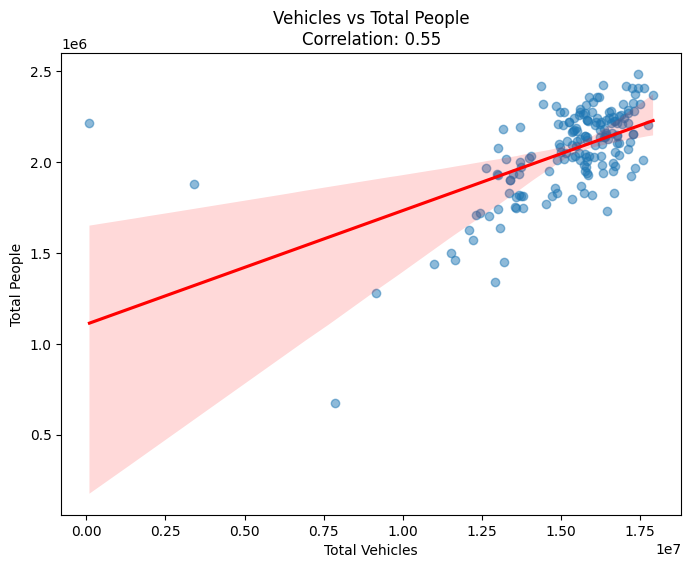

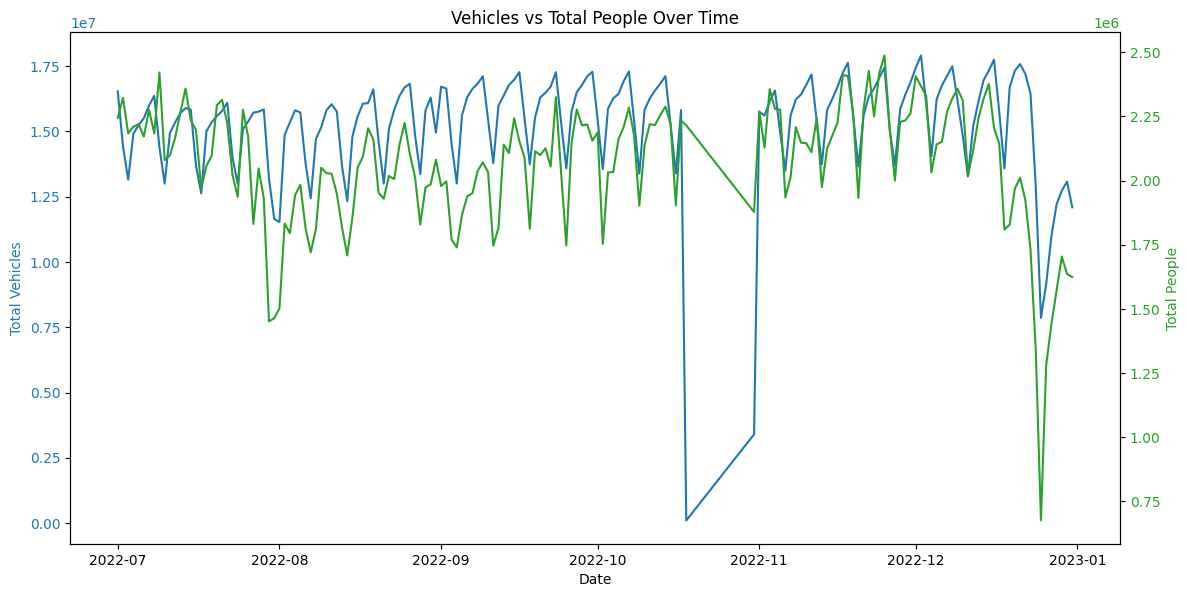

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot with regression line (Vehicles vs Total People)
plt.figure(figsize=(8, 6))
sns.regplot(
    data=merged_traffic_pedcycle,
    x='TotalVehicles',
    y='TotalPeople',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

# Calculates Pearson correlation between total vehicles and total people
corr, _ = pearsonr(merged_traffic_pedcycle['TotalVehicles'], merged_traffic_pedcycle['TotalPeople'])

plt.title(f'Vehicles vs Total People\nCorrelation: {corr:.2f}')
plt.xlabel('Total Vehicles')
plt.ylabel('Total People')
plt.show()

# Line plot with dual y-axes (Vehicles vs Total People over time)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary y-axis for vehicles
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Vehicles', color=color)
ax1.plot(merged_traffic_pedcycle['Day_date'], merged_traffic_pedcycle['TotalVehicles'], color=color, label='Vehicles')
ax1.tick_params(axis='y', labelcolor=color)

# Secondary y-axis for total people
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total People', color=color)
ax2.plot(merged_traffic_pedcycle['Day_date'], merged_traffic_pedcycle['TotalPeople'], color=color, label='Total People')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Vehicles vs Total People Over Time')
plt.show()


Even with this limitation, we were able to analyze the relationship between vehicle traffic and the combined flow of pedestrians and cyclists. This analysis helped us understand how different mobility patterns coexist in the city, and the results showed a strong positive correlation between daily vehicle volume and the number of pedestrians and cyclists. This finding likely reflects typical urban dynamics in Dublin, where days with higher traffic volumes also coincide with higher pedestrian and cyclist activity.

